# Collecting Weather Data using Meteostat

In [ ]:
pip install meteostat

In [ ]:
import pandas as pd
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

locode = pd.read_excel("LOCODE.xlsx")

# Set time period
START = datetime(2025, 2, 1)
END = datetime(2025, 3, 1)

weather_data = pd.DataFrame()
locode.head()



,LOCODE,Port,Country,Latitude,Longitude
0,CNYTN,Yantian,China,22.575000,114.27650
1,VNVUT,Vung Tau,Vietnam,10.394570,107.09850
2,CNTXG,Tianjin,China,38.975833,117.78750
3,MYTPP,Tanjung Pelepas,Malaysia,1.385500,103.54100
4,SGSIN,Singapore,Singapore,1.259365,103.75445


In [ ]:
for index, row in locode.iterrows():
  # Create Point for Port
  port = Point(float(row["Latitude"]), float(row["Longitude"]))

  # Get weekly data for 2024
  data = Daily(port, START,END)
  try:
    data = data.normalize()
    # data = data.aggregate("W-MON")
    data = data.fetch()
    data = data[data.index.to_series().between(START,END)]
    data["LOCODE"] = row["LOCODE"]
  except KeyError:
    continue

  weather_data = pd.concat([weather_data,data])

In [ ]:
weather_data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,LOCODE
time,,,,,,,,,,,
2025-02-01,19.7,17.0,22.0,0.0,NaN,188.0,8.1,NaN,1012.7,NaN,CNYTN
2025-02-02,19.6,18.0,21.0,0.0,NaN,163.0,9.8,NaN,1013.5,NaN,CNYTN
2025-02-03,14.6,12.0,17.0,1.9,NaN,3.0,21.1,NaN,1019.8,NaN,CNYTN
2025-02-04,14.4,11.0,19.0,0.0,NaN,24.0,17.6,NaN,1022.4,NaN,CNYTN
2025-02-05,15.8,12.0,18.0,0.0,NaN,37.0,9.9,NaN,1019.2,NaN,CNYTN


In [ ]:
weather_data.to_csv('weather' + datetime.today().strftime('%d%m%Y') + '.csv')

# Visualisation

In [ ]:
START = datetime(2024, 1, 1)
END = datetime(2024, 12, 31)

# Create Point for Shanghai
port = Point(31.366365, 121.61475)

# Get weekly data for 2024
data = Daily(port, START,END)
data = data.normalize()
data = data.aggregate("W-SUN")
data = data.fetch()
data = data[data.index.to_series().between(START,END)]

In [ ]:
data.tail()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-12-01,9.7,1.9,18.8,4.1,NaN,243.7,9.2,NaN,1021.4,0.0
2024-12-08,10.5,2.8,21.4,0.3,NaN,338.3,6.8,NaN,1024.4,0.0
2024-12-15,6.7,-2.2,11.0,16.3,NaN,339.8,9.4,NaN,1027.7,0.0
2024-12-22,5.4,-2.4,14.2,0.0,NaN,302.1,7.7,NaN,1028.9,0.0
2024-12-29,5.8,-4.1,12.2,0.0,NaN,339.3,6.5,NaN,1030.2,0.0


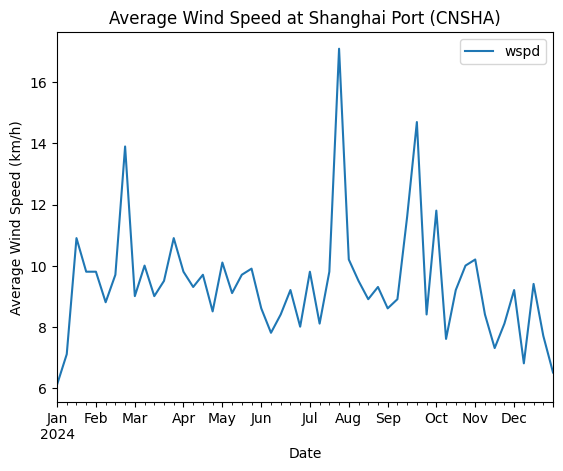

In [ ]:
# Plot line chart for wind speed
data.plot(y=['wspd'])
plt.title("Average Wind Speed at Shanghai Port (CNSHA)")
plt.xlabel("Date")
plt.ylabel("Average Wind Speed (km/h)")
plt.show()

Compare to Port Congestion level graph, there appears to be correlation.

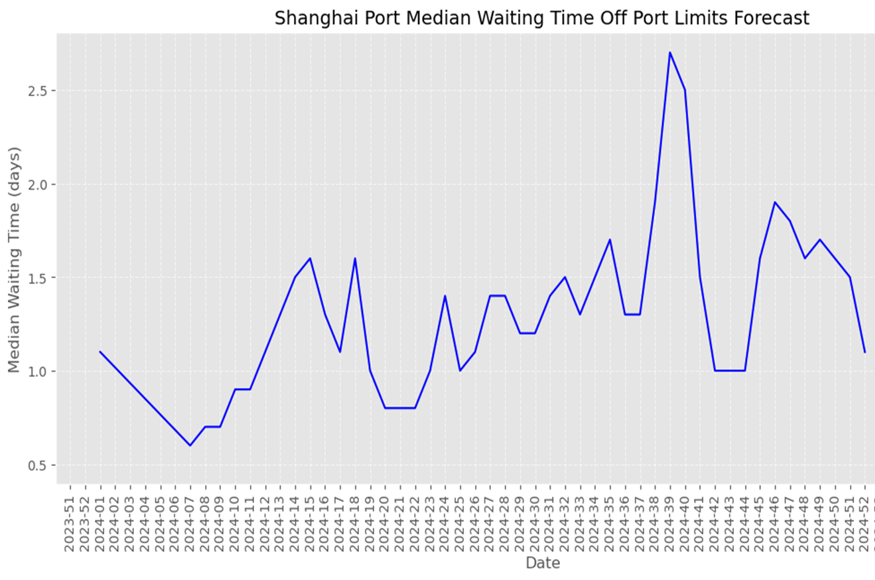

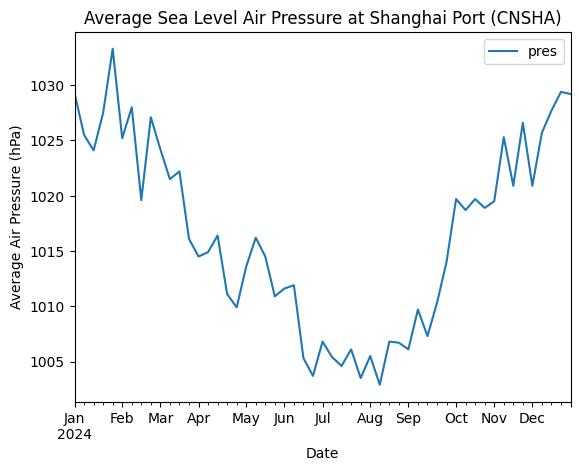

In [ ]:
# plot line chart for air pressure
data.plot(y=['pres'])
plt.title("Average Sea Level Air Pressure at Shanghai Port (CNSHA)")
plt.xlabel("Date")
plt.ylabel("Average Air Pressure (hPa)")
plt.show()

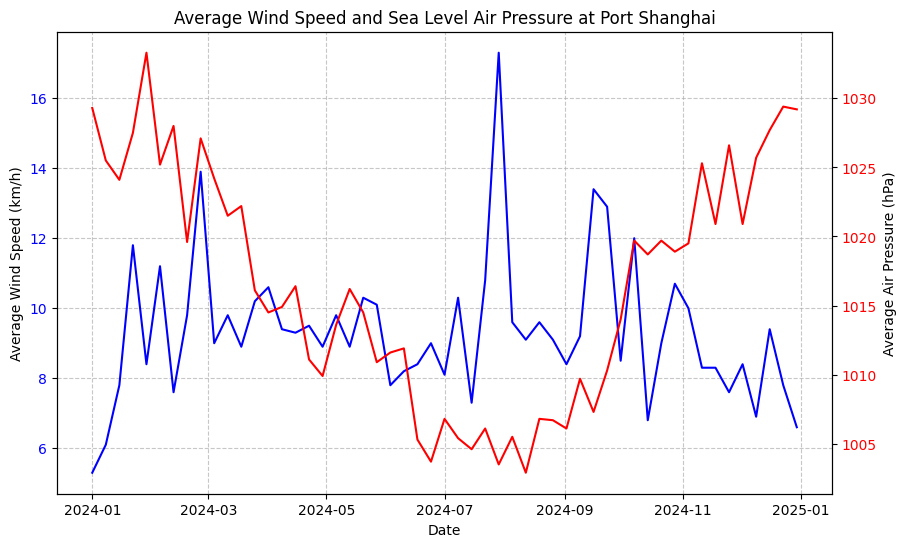

In [ ]:
#Set plot size
fig, ax1 = plt.subplots(figsize=(10,6))

#plot wind speed
ax1.plot(data['wspd'],color = 'blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Average Wind Speed (km/h)")
ax1.tick_params(axis='y',labelcolor='blue')

#plot air pressure
ax2 = ax1.twinx()
ax2.plot(data['pres'],color = 'red')
ax2.set_ylabel("Average Air Pressure (hPa)")
ax2.tick_params(axis='y',labelcolor='red')

#set title, gridlines
plt.title("Average Wind Speed and Sea Level Air Pressure at Port Shanghai")
ax1.grid(linestyle="--",alpha=0.7)

plt.show()

The peak in wind speed and sharp drop in air pressure in late July can be attributed to **Typhoon Gaemi**.

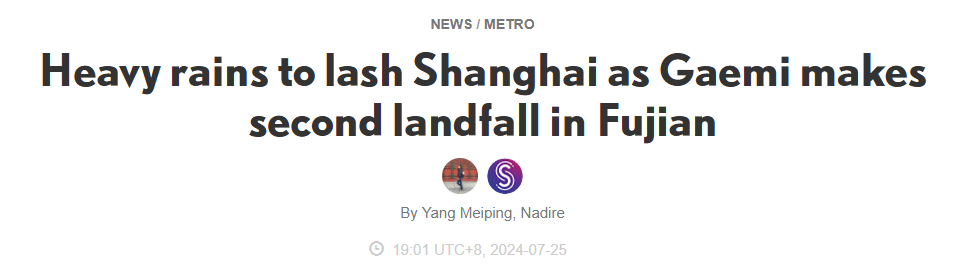

Wind speed can be a strong predictor of high median vessel delay. Strong winds, especially above 25–30 knots (46–56 km/h), can cause dangerous conditions for vessel berthing, cargo handling (especially cranes), and container stacking.
Sudden shifts in wind patterns can signal approaching storms, prompting pre-emptive port closures.
Storms, typhoons, and cyclones typically develop at sea. Tracking these systems 150–300 nautical miles (nm) offshore can provide 24–72 hours lead time for port closure decisions.

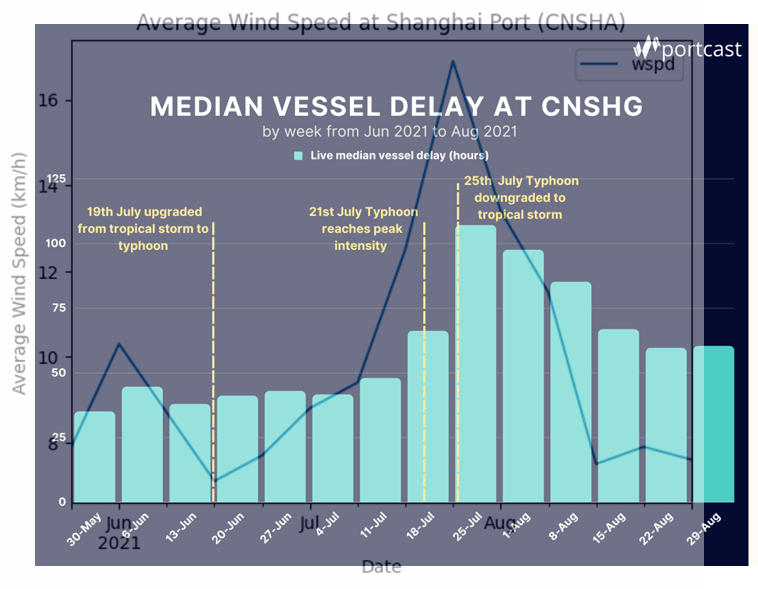

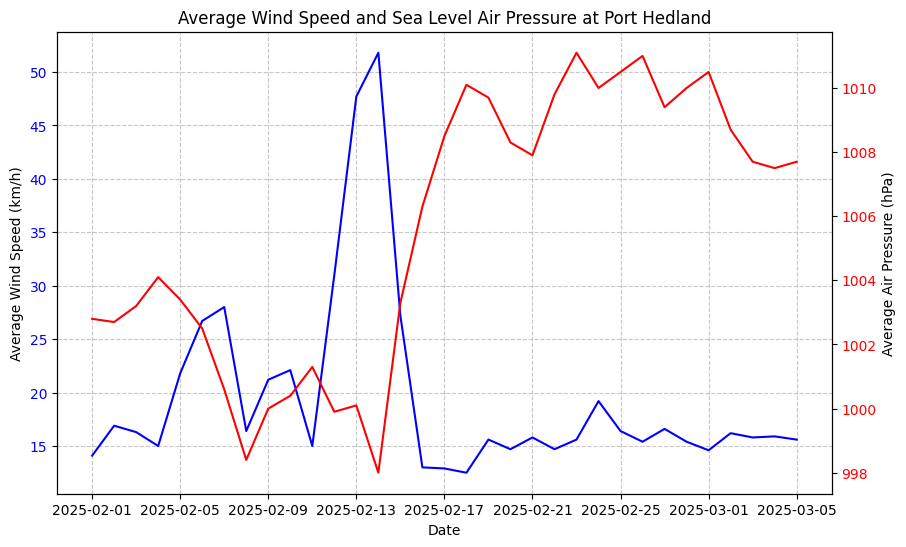

In [ ]:
#Load daily weather data of Port Hedland (AUPHE)
port_hedland = Point(-20.31, 118.601111) #lat-lon coordinates
start = datetime(2025, 2, 1)
end = datetime(2025, 3, 15)
data = Daily(port_hedland, start, end)
data = data.normalize()
data = data.fetch()

#Set plot size
fig, ax1 = plt.subplots(figsize=(10,6))

#plot wind speed
ax1.plot(data['wspd'],color = 'blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Average Wind Speed (km/h)")
ax1.tick_params(axis='y',labelcolor='blue')

#plot air pressure
ax2 = ax1.twinx()
ax2.plot(data['pres'],color = 'red')
ax2.set_ylabel("Average Air Pressure (hPa)")
ax2.tick_params(axis='y',labelcolor='red')

#set title, gridlines
plt.title("Average Wind Speed and Sea Level Air Pressure at Port Hedland")
ax1.grid(linestyle="--",alpha=0.7)

plt.show()

The peak in wind speed and sharp drop in air pressure in mid-February can be attributed to Category 5 **Tropical Cyclone Zelia.**

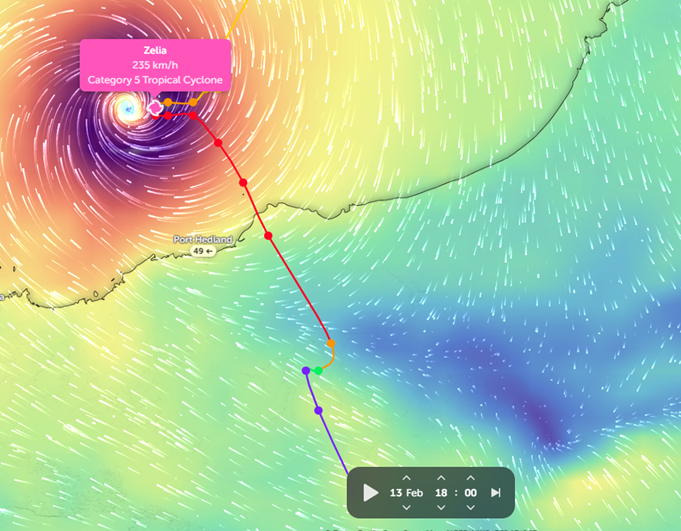


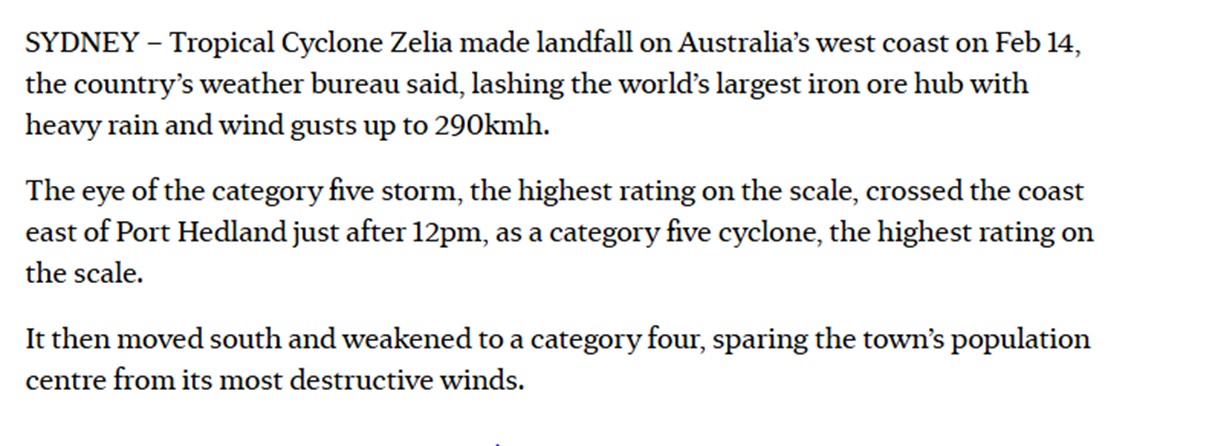